In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from tkinter import font
from turtle import color
from cairo import FontWeight
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#Loading data
df = pd.read_csv('booking_list_in_vilnius_review_more_than_10.csv', encoding='utf-8')

#Separating date interval
split_dates = df['date'].str.split('-', n=3, expand=True)
df['start_date'] = split_dates[0] + '-' + split_dates[1] + '-' + split_dates[2]
df['end_date'] = split_dates[3].str[:4] + '-' + split_dates[3].str[5:7] + '-' + split_dates[3].str[8:]


#Converting dates to a datetime format
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

#extracting month from 'start date'
df['start_month'] = df['start_date'].dt.month


#creating binary columns for each month from 1 to 12.
for month in range(1, 13):
    df[f'start_month_{month}'] = df['start_month'] == month


#converting price column to numeric value, removing eur symbol and commas
df['price'] = df['price'].replace('[\€,]', '', regex=True)
df['price'] = df['price'].str.replace(' ', '') #removing spaces
df['price'] = pd.to_numeric(df['price'], errors='coerce') #converting to numeric



#convert review quantity to numeric
df['review_quantity'] = pd.to_numeric(df['review_quantity'], errors='coerce')

# Converting score to numeric
df['score'] = df['score'].str.extract(r'(\d+\,\d+)')[0]  # Extracting numeric part with comma
df['score'] = df['score'].str.replace(',', '.').astype(float)  # Replacing comma with dot and converting to float


In [3]:

results = {}
min_prices = []
max_prices = []
mean_prices = []

for month in range(1, 13):
    month_column = f'start_month_{month}'

    #filtered dataframe for records where the current month column is True
    month_data = df[df[month_column]]

    #cheking is the are any data for this month
    if not month_data.empty:
        min_price = month_data['price'].min()
        max_price = month_data['price'].max()
        mean_price = round(month_data['price'].mean(), 2)

        min_prices.append(min_price)
        max_prices.append(max_price)
        mean_prices.append(mean_price)

        #sort by review quantity as MOST POPULAR
        month_data_sorted_by_reviews = month_data.sort_values(by=['review_quantity', 'score'], ascending=False)

        #Find 10 cheapest results
        top_10_cheapest = month_data_sorted_by_reviews.nsmallest(10, 'price')

        #Find 10 most expensive results
        top_10_most_expensive = month_data_sorted_by_reviews.nlargest(10, 'price')

        results[f'Month_{month}'] = {
            'Min Price': min_price,
            'Max Price': max_price,
            'Mean Price': mean_price, 
            'Top 10 Cheapest': top_10_cheapest, 
            'Top 10 Most Expensive': top_10_most_expensive
        }
    else:
        results[f'Month_{month}'] = {
            'Min Price': None,
            'Max Price': None,
            'Mean Price': None,
            'Top 10 Cheapest': pd.DataFrame(), 
            'Top 10 Most Expensive': pd.DataFrame()
        }



# Convert min_prices, max_prices, and mean_prices to pandas Series for plotting
months = list(range(1, 13))
min_prices = pd.Series(min_prices, index=months)
max_prices = pd.Series(max_prices, index=months)
mean_prices = pd.Series(mean_prices, index=months)

In [4]:
results

{'Month_1': {'Min Price': 41,
  'Max Price': 430,
  'Mean Price': 108.71,
  'Top 10 Cheapest':                                                   title  review_quantity  \
  5817                                  Jimmy Jumps House              308   
  5085  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
  5763  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
  5796  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
  5001                                  Jimmy Jumps House              308   
  5039                                  Jimmy Jumps House              308   
  5075                                  Jimmy Jumps House              308   
  5136                                  Jimmy Jumps House              308   
  5236                                  Jimmy Jumps House              308   
  5273                                  Jimmy Jumps House              308   
  
        price  score                   date  \

In [5]:
# Function to display results
def display_results(month_results):
    for month, data in month_results.items():
        print(f"\n{month}:")
        print(f"Minimum Price: {data['Min Price']}")
        print(f"Maximum Price: {data['Max Price']}")
        print(f"Mean Price: {data['Mean Price']}")

        # Display Top 10 Cheapest Listings
        print("\nTop 10 Cheapest Listings:")
        if not data['Top 10 Cheapest'].empty:
            print(data['Top 10 Cheapest'][['title', 'review_quantity', 'price', 'score', 'start_date']])
        else:
            print("No data available.")

        # Display Top 10 Most Expensive Listings
        print("\nTop 10 Most Expensive Listings:")
        if not data['Top 10 Most Expensive'].empty:
            print(data['Top 10 Most Expensive'][['title', 'review_quantity', 'price', 'score', 'start_date']])
        else:
            print("No data available.")

# Display the results
display_results(results) 





Month_1:
Minimum Price: 41
Maximum Price: 430
Mean Price: 108.71

Top 10 Cheapest Listings:
                                                  title  review_quantity  \
5817                                  Jimmy Jumps House              308   
5085  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
5763  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
5796  HaPPy Inn ArkA the heart of Old Town, Self-Che...               68   
5001                                  Jimmy Jumps House              308   
5039                                  Jimmy Jumps House              308   
5075                                  Jimmy Jumps House              308   
5136                                  Jimmy Jumps House              308   
5236                                  Jimmy Jumps House              308   
5273                                  Jimmy Jumps House              308   

      price  score start_date  
5817     41    9.6 2025-01-29  
5085  

<Figure size 1400x1200 with 0 Axes>

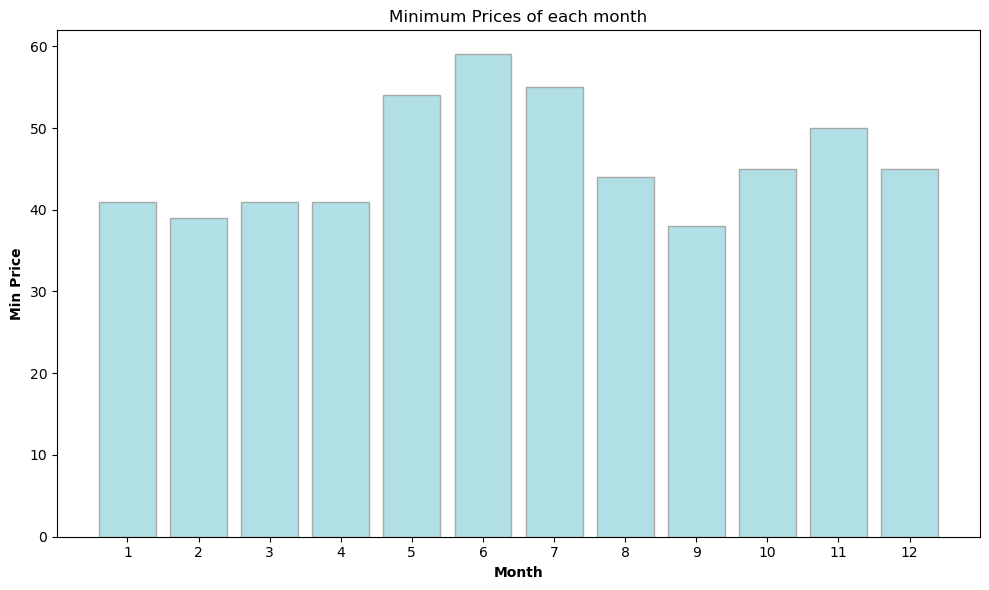

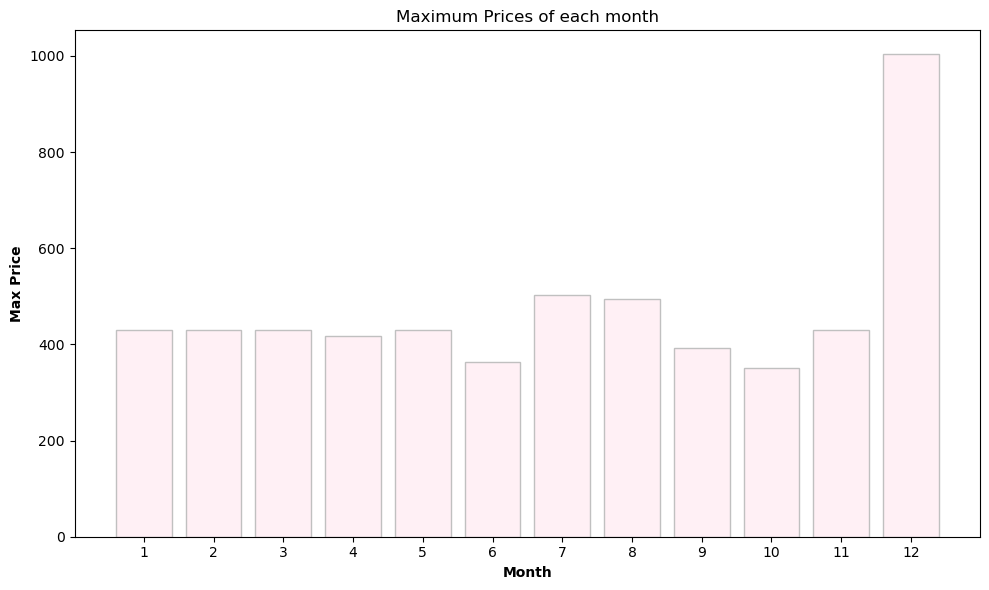

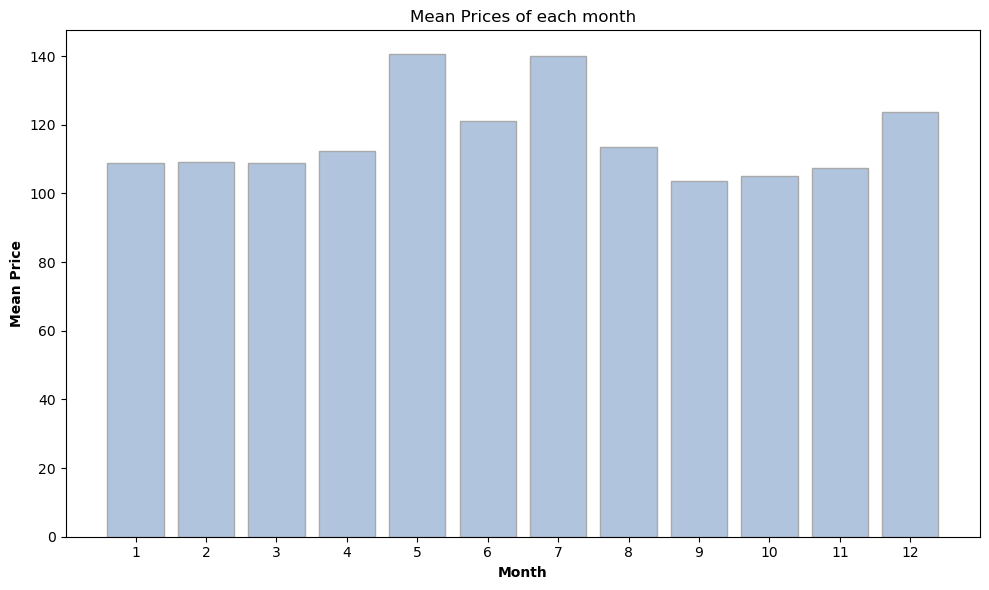

In [6]:
#plotting the histogram
months = list(range(1, 13))

plt.figure(figsize=(14, 12))

#histogram for minimum prices
plt.figure(figsize=(10,6))
plt.bar(months, min_prices, color='powderblue', edgecolor='darkgrey')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Min Price', fontweight='bold')
plt.xticks(months)
plt.title('Minimum Prices of each month')
plt.tight_layout()
plt.show()
# bar_width = 0.35

# Histogram for Maximum Prices
plt.figure(figsize=(10,6))
plt.bar(months, max_prices, color='lavenderblush', edgecolor='silver')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Max Price', fontweight='bold')
plt.xticks(months)
plt.title('Maximum Prices of each month')
plt.tight_layout()
plt.show()

# Histogram for Mean Prices
plt.figure(figsize=(10,6))
plt.bar(months, mean_prices, color='lightsteelblue', edgecolor='darkgrey')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Mean Price', fontweight='bold')
plt.xticks(months)
plt.title('Mean Prices of each month')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='score', ylabel='price'>

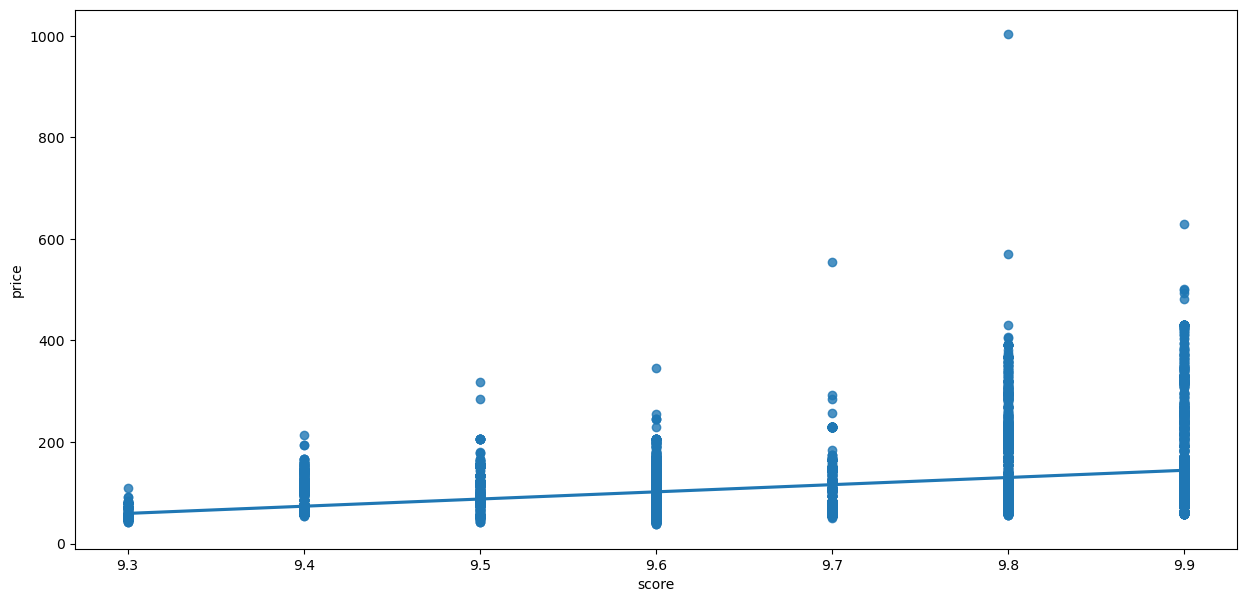

In [7]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x='score', y='price', data= df, ax=ax)

<AxesSubplot:xlabel='review_quantity', ylabel='price'>

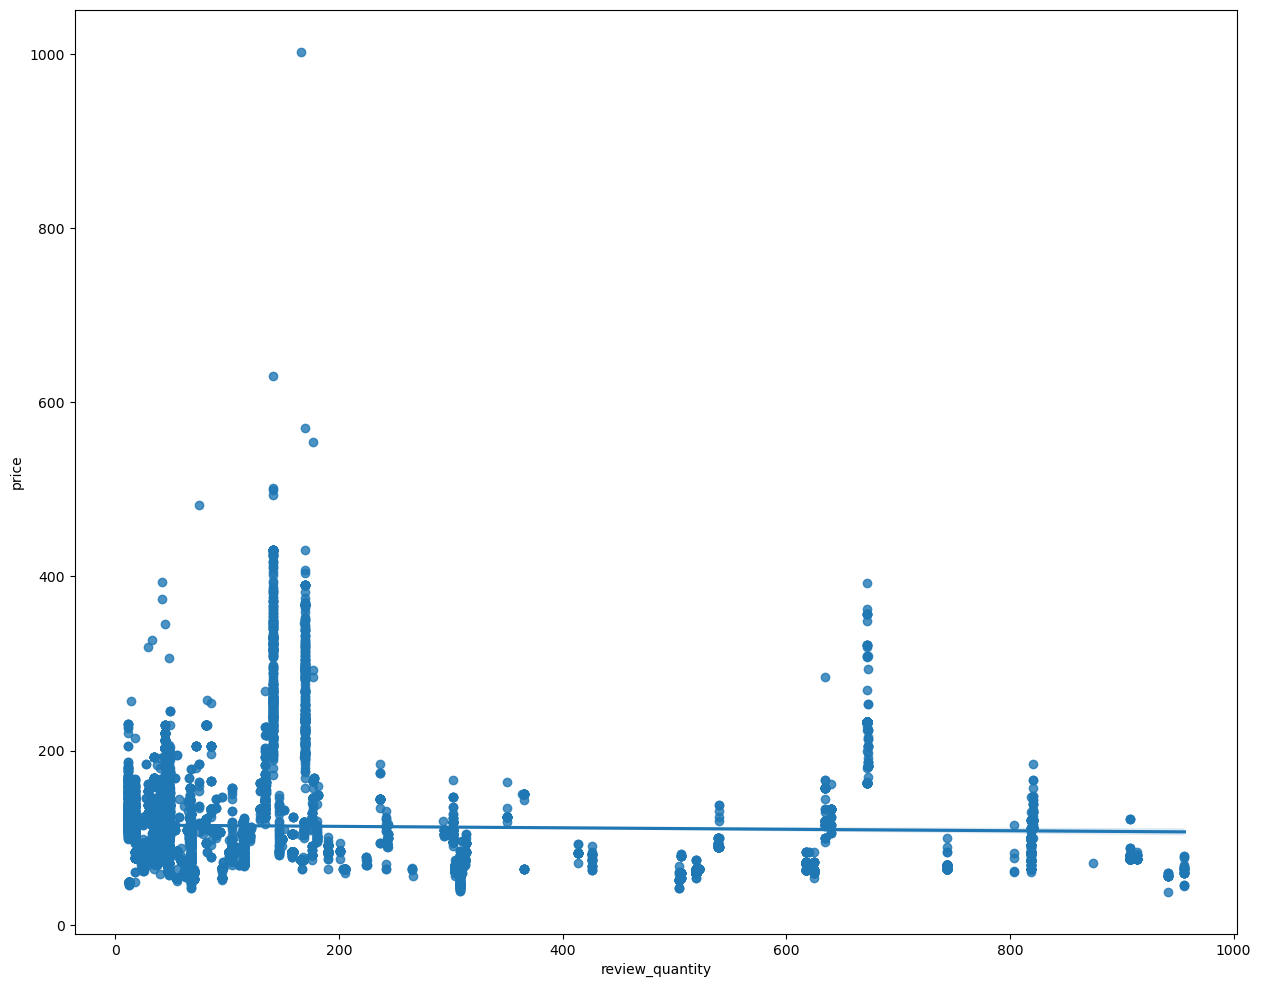

In [8]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.regplot(x='review_quantity', y='price', data= df, ax=ax)

<AxesSubplot:xlabel='score', ylabel='review_quantity'>

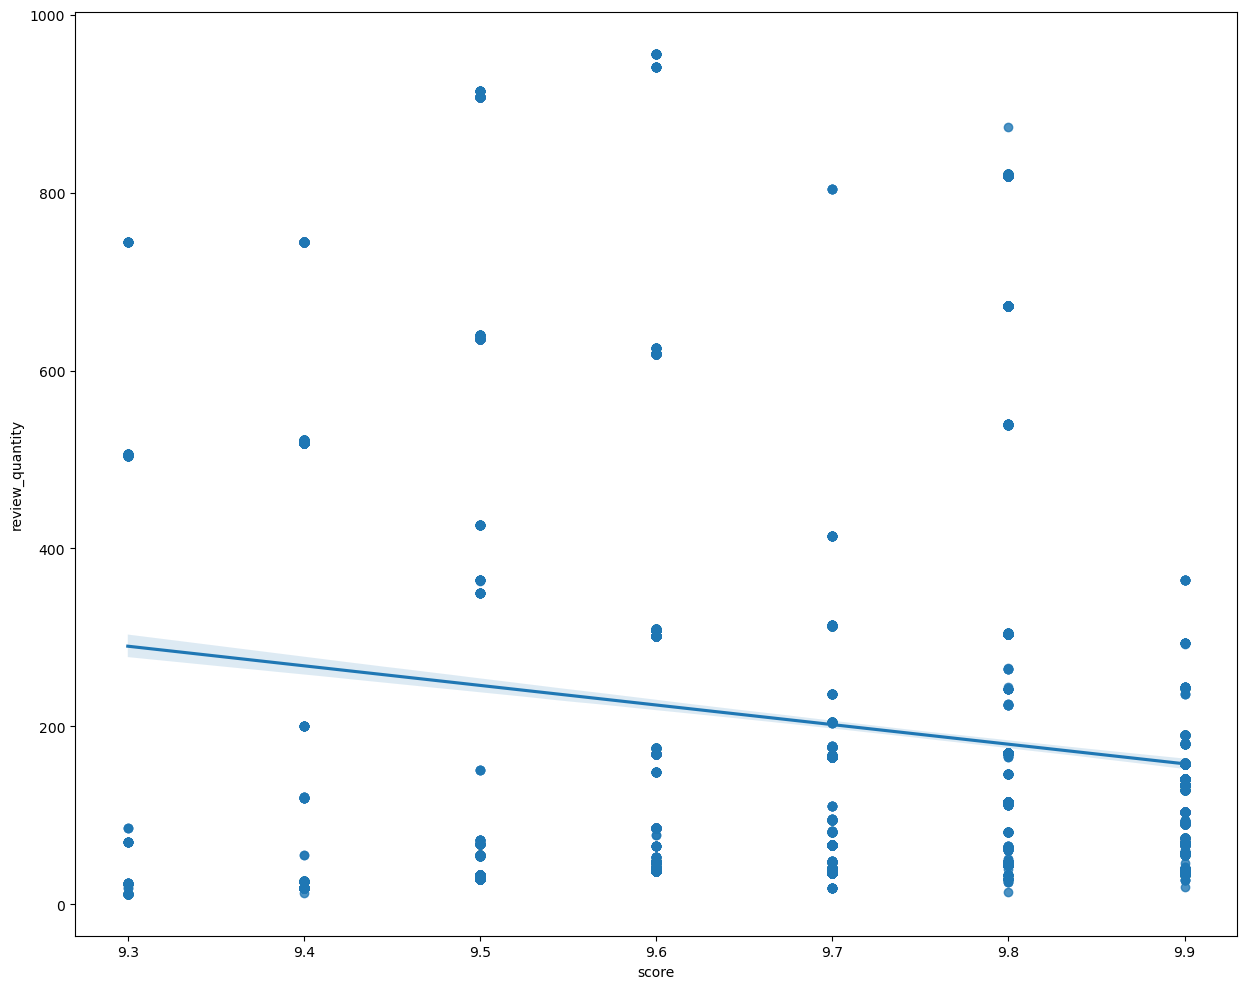

In [9]:
fig, ax = plt.subplots(figsize=(15, 12))
sns.regplot(x='score', y='review_quantity', data= df, ax=ax)

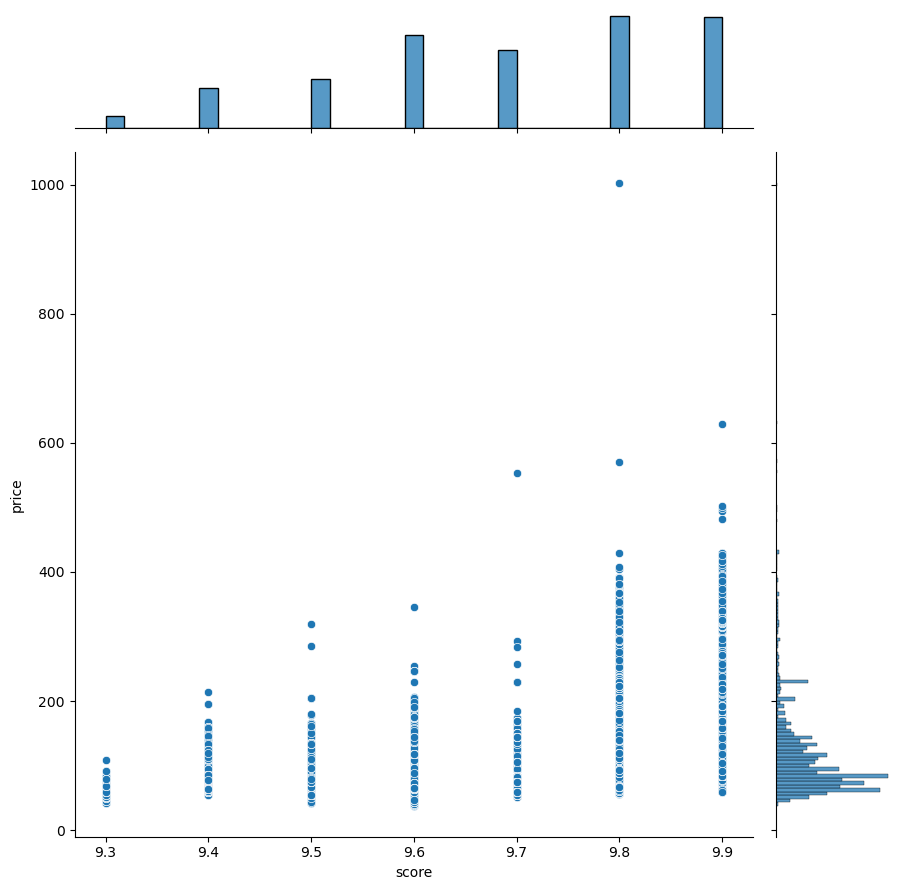

In [10]:
sns.jointplot(x="score", y="price", data=df, height=9)

# User interface

To chose month and max price per night

In [11]:
# Function to display results with unique titles for the cheapest and most expensive referrals
def display_unique_title_results(df, month, max_price):
    # Filter data for the selected month and max price
    month_data = df[(df['start_month'] == month) & (df['price'] <= max_price)]

    
    if month_data.empty:
        print("No data available for the selected month and price range.")
        return

    # Sort by review quantity as MOST POPULAR
    month_data_sorted_by_reviews = month_data.sort_values(by=['review_quantity', 'score'], ascending=False)

    # Group by title to get unique titles
    unique_titles_cheapest = month_data_sorted_by_reviews.groupby('title').apply(lambda x: x.nsmallest(1, 'price')).reset_index(drop=True)
    unique_titles_expensive = month_data_sorted_by_reviews.groupby('title').apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)

    # Select the top 10 cheapest unique titles
    top_10_cheapest_unique_titles = unique_titles_cheapest.nsmallest(10, 'price')

    # Select the top 10 most expensive unique titles
    top_10_most_expensive_unique_titles = unique_titles_expensive.nlargest(10, 'price')

    # Function to format DataFrame for pretty printing
    def format_for_display(df):
        # Create a formatted string for each row
        formatted_rows = []
        for index, row in df.iterrows():
            formatted_rows.append(f"{row['title']:<30} {row['review_quantity']:>5} {row['price']:>10.2f} {row['score']:>5.1f} {row['start_date'].strftime('%Y-%m-%d')} {row['link']}")
        return '\n'.join(formatted_rows)

    # Display the results with links
    print(f"\nTop 10 Cheapest Unique Titles for Month {month}:")
    if not top_10_cheapest_unique_titles.empty:
        print(format_for_display(top_10_cheapest_unique_titles))
    else:
        print("No data available.")

    print(f"\nTop 10 Most Expensive Unique Titles for Month {month}:")
    if not top_10_most_expensive_unique_titles.empty:
        print(format_for_display(top_10_most_expensive_unique_titles))
    else:
        print("No data available.")

# Load data
df = pd.read_csv('booking_list_in_vilnius_review_more_than_10.csv', encoding='utf-8')

# Separating date interval
split_dates = df['date'].str.split('-', n=3, expand=True)
df['start_date'] = split_dates[0] + '-' + split_dates[1] + '-' + split_dates[2]
df['end_date'] = split_dates[3].str[:4] + '-' + split_dates[3].str[5:7] + '-' + split_dates[3].str[8:]

# Converting dates to a datetime format
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Extracting month from 'start date'
df['start_month'] = df['start_date'].dt.month

# Converting price column to numeric value, removing eur symbol and commas
df['price'] = df['price'].replace('[\€,]', '', regex=True)
df['price'] = df['price'].str.replace(' ', '')  # removing spaces
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # converting to numeric

# Convert review quantity to numeric
df['review_quantity'] = pd.to_numeric(df['review_quantity'], errors='coerce')

# Converting score to numeric
df['score'] = df['score'].str.extract(r'(\d+\,\d+)')[0]  # Extracting numeric part with comma
df['score'] = df['score'].str.replace(',', '.').astype(float)  # Replacing comma with dot and converting to float

# Add 'link' column to dataframe
df['link'] = df['link'].str.strip()  # Make sure to clean up any extra spaces

# Prompt the user for inputs
try:
    month = int(input("Enter the month (1-12) you want to travel: "))
    max_price = float(input("Enter the maximum price per night: "))
    display_unique_title_results(df, month, max_price)
except ValueError:
    print("Invalid input. Please enter numeric values for month and price.")


Top 10 Cheapest Unique Titles for Month 5:
Vilnius Old Town accommodation   519      54.00   9.4 2025-05-23 https://www.booking.com/hotel/lt/old-town-guest-house.lt.html?aid=304142&label=gen173nr-1FCAQoggJCDnNlYXJjaF92aWxuaXVzSBlYBGiIAYgBAZgBGbgBGcgBDNgBAegBAfgBA4gCAagCA7gCoKegtQbAAgHSAiQ4OGQ1YTg2ZS0xMGRjLTQyZWQtYjE4My1lZTUyM2RkNzJkMjPYAgXgAgE&ucfs=1&arphpl=1&checkin=2025-05-23&checkout=2025-05-24&group_adults=2&req_adults=2&no_rooms=1&group_children=0&req_children=0&hpos=13&hapos=38&sr_order=review_score_and_price&nflt=distance%3D1000%3Breview_score%3D80&srpvid=d6ef9c1042940029&srepoch=1722291118&all_sr_blocks=286939101_108234912_2_0_0&highlighted_blocks=286939101_108234912_2_0_0&matching_block_id=286939101_108234912_2_0_0&sr_pri_blocks=286939101_108234912_2_0_0__5400&from_sustainable_property_sr=1&from=searchresults
Sweet home6                       67      59.00   9.7 2025-05-01 https://www.booking.com/hotel/lt/sweet-home6.lt.html?aid=304142&label=gen173nr-1FCAQoggJCDnNlYXJjaF92aWx

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10832 entries, 0 to 10831
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            10832 non-null  object        
 1   review_quantity  10832 non-null  int64         
 2   price            10832 non-null  int64         
 3   score            9768 non-null   float64       
 4   date             10832 non-null  object        
 5   link             10832 non-null  object        
 6   start_date       10832 non-null  datetime64[ns]
 7   end_date         10832 non-null  datetime64[ns]
 8   start_month      10832 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 761.8+ KB


In [13]:
df[df['score'].isnull()]

,title,review_quantity,price,score,date,link,start_date,end_date,start_month
4,"Angel House Vilnius, 36A",11,98,NaN,2024-09-01-2024-09-02,https://www.booking.com/hotel/lt/angel-house-v...,2024-09-01,2024-09-02,9
18,"HaPPy Inn Ugnė, The studio is in the heart of ...",37,74,NaN,2024-09-01-2024-09-02,https://www.booking.com/hotel/lt/happy-inn-ugn...,2024-09-01,2024-09-02,9
59,"HaPPy Inn Ugnė, The studio is in the heart of ...",37,78,NaN,2024-09-02-2024-09-03,https://www.booking.com/hotel/lt/happy-inn-ugn...,2024-09-02,2024-09-03,9
102,"HaPPy Inn Ugnė, The studio is in the heart of ...",37,82,NaN,2024-09-03-2024-09-04,https://www.booking.com/hotel/lt/happy-inn-ugn...,2024-09-03,2024-09-04,9
150,"HaPPy Inn Ugnė, The studio is in the heart of ...",37,82,NaN,2024-09-04-2024-09-05,https://www.booking.com/hotel/lt/happy-inn-ugn...,2024-09-04,2024-09-05,9
...,...,...,...,...,...,...,...,...,...
10799,Sweet home30,63,60,NaN,2025-07-30-2025-07-31,https://www.booking.com/hotel/lt/sweet-home2.l...,2025-07-30,2025-07-31,7
10809,"Angel House Vilnius, 36A",11,159,NaN,2025-07-31-2025-08-01,https://www.booking.com/hotel/lt/angel-house-v...,2025-07-31,2025-08-01,7
10812,Sweet home30,63,60,NaN,2025-07-31-2025-08-01,https://www.booking.com/hotel/lt/sweet-home2.l...,2025-07-31,2025-08-01,7
10822,"Angel House Vilnius, 36A",11,164,NaN,2025-08-01-2025-08-02,https://www.booking.com/hotel/lt/angel-house-v...,2025-08-01,2025-08-02,8


In [14]:
# Mean Inputation
df['score'] = df['score'].fillna(df['score'].mean())


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10832 entries, 0 to 10831
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            10832 non-null  object        
 1   review_quantity  10832 non-null  int64         
 2   price            10832 non-null  int64         
 3   score            10832 non-null  float64       
 4   date             10832 non-null  object        
 5   link             10832 non-null  object        
 6   start_date       10832 non-null  datetime64[ns]
 7   end_date         10832 non-null  datetime64[ns]
 8   start_month      10832 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 761.8+ KB


In [16]:
df_without_link_title_date = df.drop(columns=['link', 'title', 'date', 'start_month'])

In [17]:
df_without_link_title_date

,review_quantity,price,score,start_date,end_date
0,18,80,9.700000,2024-09-01,2024-09-02
1,104,84,9.900000,2024-09-01,2024-09-02
2,112,86,9.800000,2024-09-01,2024-09-02
3,635,95,9.500000,2024-09-01,2024-09-02
4,11,98,9.695321,2024-09-01,2024-09-02
...,...,...,...,...,...
10827,168,74,9.700000,2025-08-01,2025-08-02
10828,141,355,9.900000,2025-08-01,2025-08-02
10829,49,144,9.600000,2025-08-01,2025-08-02
10830,170,323,9.800000,2025-08-01,2025-08-02


In [18]:
df_without_link_title_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10832 entries, 0 to 10831
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   review_quantity  10832 non-null  int64         
 1   price            10832 non-null  int64         
 2   score            10832 non-null  float64       
 3   start_date       10832 non-null  datetime64[ns]
 4   end_date         10832 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 423.2 KB


### Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

In [20]:
#Spliting start date column to 3 different columns
df_without_link_title_date['year'] = df_without_link_title_date['start_date'].dt.year
df_without_link_title_date['month'] = df_without_link_title_date['start_date'].dt.month
df_without_link_title_date['day'] = df_without_link_title_date['start_date'].dt.day

X = df_without_link_title_date.drop(columns=['price'])
y = df_without_link_title_date['price']

In [21]:
#Handling datetime columns
datetime_columns = X.select_dtypes(include=[np.datetime64]).columns

# Convert datetime columns to numerical features
for col in datetime_columns:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    # Drop the original datetime column
    X = X.drop(columns=[col])




In [22]:
df_without_link_title_date

,review_quantity,price,score,start_date,end_date,year,month,day
0,18,80,9.700000,2024-09-01,2024-09-02,2024,9,1
1,104,84,9.900000,2024-09-01,2024-09-02,2024,9,1
2,112,86,9.800000,2024-09-01,2024-09-02,2024,9,1
3,635,95,9.500000,2024-09-01,2024-09-02,2024,9,1
4,11,98,9.695321,2024-09-01,2024-09-02,2024,9,1
...,...,...,...,...,...,...,...,...
10827,168,74,9.700000,2025-08-01,2025-08-02,2025,8,1
10828,141,355,9.900000,2025-08-01,2025-08-02,2025,8,1
10829,49,144,9.600000,2025-08-01,2025-08-02,2025,8,1
10830,170,323,9.800000,2025-08-01,2025-08-02,2025,8,1


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#Standartazing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)


#model building
model = LinearRegression()
model.fit(X_train_scaled, y_train)

#predictions
y_pred = model.predict(X_test_scaled)

# numpPy array converting to pandas series
predictions = pd.Series(data=y_pred, name='Predictions')


#model evaluating
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 3538.586714865684
R-squared: 0.15684046677829933


In [24]:
# Real values vs predicted values comparison
comparison = pd.DataFrame({'Actual Price': y_test.reset_index(drop=True), 'Predicted Price': y_pred})

# Display the first few rows of the comparison
print(comparison.head(10))

   Actual Price  Predicted Price
0            72       137.139716
1            59       109.864817
2           142       115.393675
3           133       137.629956
4            95        99.317580
5           163       129.680694
6           105       112.857077
7            64        74.264716
8           138       108.310367
9            85        96.547707


### Cross validation

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Cross validation for accuracy evaluation (tikslumo vertinimas)
scores_5 = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
scores_10 = cross_val_score(model, X_train_scaled, y_train, cv= 10, scoring='r2')

print(f'Cross validation r2 mean (cv=5): {scores_5.mean()}')
print(f'Cross validation r2 value (cv=5): {scores_5}')
print(f'Cross validation r2 mean (cv=10):{scores_10.mean()}')
print(f'Cross validation r2 value (cv=10):{scores_10}')

Cross validation r2 mean (cv=5): 0.130005506546071
Cross validation r2 value (cv=5): [0.11213038 0.14318654 0.10992636 0.1395794  0.14520485]
Cross validation r2 mean (cv=10):0.1294057633214992
Cross validation r2 value (cv=10):[0.08359476 0.12799469 0.15527073 0.13435824 0.10305047 0.11885561
 0.10543826 0.17446295 0.14254722 0.14848471]


In [26]:
# Define a preprocessing pipeline for numeric features
numeric_features = X.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features)
    ])

# polynomical features definition and ridge regression model
poly = PolynomialFeatures(degree=2)
scaler = StandardScaler()
ridge_model = Ridge(alpha=1.0)

# Sukuriame pipeline su normalizavimu, polinominiais terminais ir Ridge regresija


# Pasirenkame parametrus:
# - fit_intercept=True: Nes mūsų duomenys nėra centuoti.
# - copy_X=True: Kad užtikrintume, jog mūsų originalūs duomenys nebus pakeisti.
# - max_iter=1000: Maksimalus iteracijų skaičius, jei naudosime iteracinį solverį.
# - tol=0.0001: Konvergencijos tolerancijos lygis.
# - solver='auto': Leidžiame sklearn automatiškai pasirinkti geriausią solver'į.

ridge_model = Ridge(alpha=1.0, fit_intercept=True, copy_X=True, max_iter=1000, tol=0.0001, solver='auto')

model = make_pipeline(scaler, poly, Ridge(alpha=4.0))
model = make_pipeline(
    preprocessor,
    poly,
    scaler,
    ridge_model
)


#data ploting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Apmokome modelį su mokymo duomenimis
model.fit(X_train, y_train)

# # Atlikti kryžminę validaciją ir įvertinti modelio tikslumą
scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print("Kryžminės validacijos R^2 reikšmės:", scores)
print("Vidutinis R^2 tikslumas:", scores.mean())

Kryžminės validacijos R^2 reikšmės: [0.11694171 0.04739913 0.07851357 0.08569348 0.06581518 0.16338191
 0.13154427 0.12534759 0.15118031 0.16049324]
Vidutinis R^2 tikslumas: 0.11263103831734922


### GridSearch

In [27]:
# Sukuriame Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Setting hyperparameters web 
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

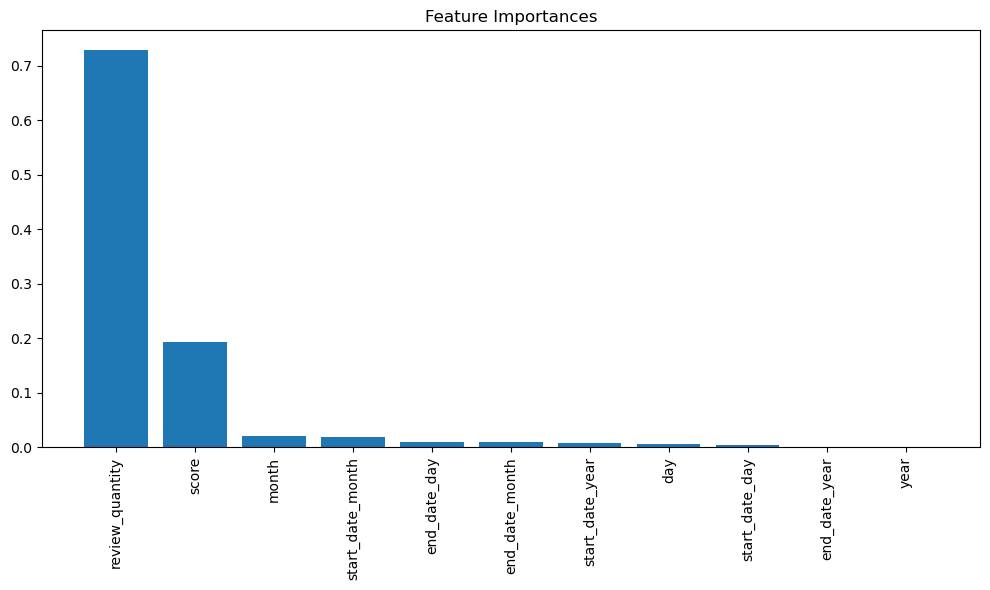

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy MSE (Mean squared error):366.717610741906
Testing MSE: 451.5596368809477
Training R2: 0.9068389064965106
Testing R2: 0.8924042722890423
Cross validation (cv=5) R2 values: [0.87649665 0.83628542 0.87163484 0.87661693 0.89819167]
Cross validation  (cv=5) mean R2: 0.8718451030015961
Cross validation  (cv=10) R2 values: [0.86900719 0.88307783 0.75388116 0.81472055 0.87785094 0.89967821
 0.8761375  0.87413041 0.90506842 0.90115936]
Cross validation  (cv=10) mean R2: 0.8654711569934163


In [28]:

grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_params = grid_search.best_params_

# best model
best_model = grid_search.best_estimator_

# Doing prognosis with best model 
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluating model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

#Cross validation with full data set
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
X_combined_scaled = scaler.fit_transform(X_combined)

cv_scores_5 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=5, scoring='r2')
cv_scores_10 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=10, scoring='r2')

#Feature importance
feature_importances = best_model.feature_importances_
features = X.columns

indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

#Printing results

print(f'Best parameters: {best_params}')
print(f'Accuracy MSE (Mean squared error):{train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Testing R2: {test_r2}')

print(f'Cross validation (cv=5) R2 values: {cv_scores_5}')
print(f'Cross validation  (cv=5) mean R2: {cv_scores_5.mean()}')

print(f'Cross validation  (cv=10) R2 values: {cv_scores_10}')
print(f'Cross validation  (cv=10) mean R2: {cv_scores_10.mean()}')

### Lasso regressor with plynomical features

In [29]:
#data ploting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [30]:
# Normalizing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sukuriame Ridge Regression modelį
ridge = Lasso()

# Nustatome hiperparametrų tinklą
param_grid = {
    'alpha': [1, 1.5, 2, 2.5, 10, 100]
}

# Naudojame GridSearchCV geriausiems parametrams rasti
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1, 1.5, 2, 2.5, 10, 100]}, scoring='r2')

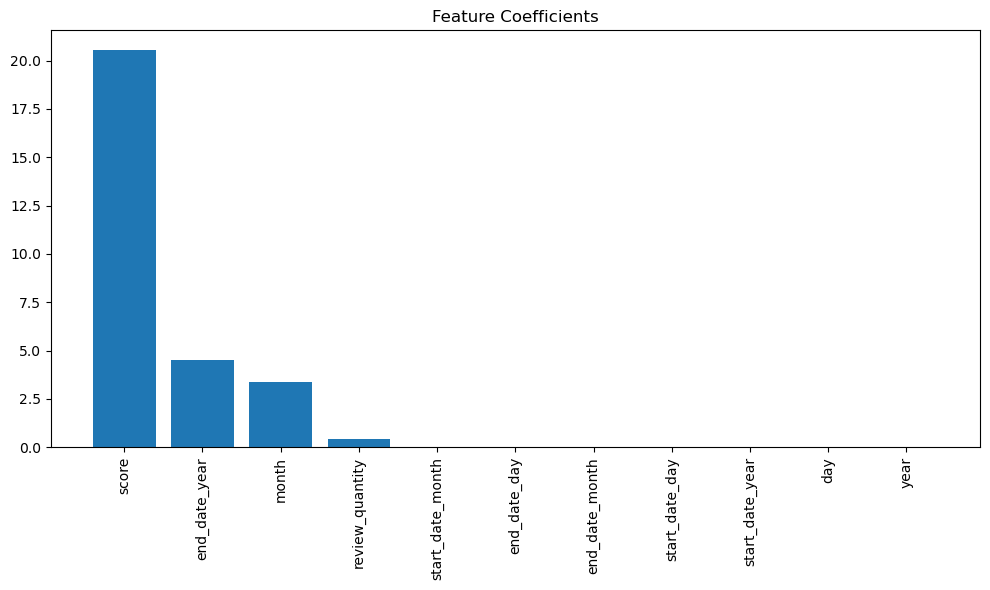

Best parameters: {'alpha': 1}
Accuracy MSE (Mean squared error):3448.1992755497777
Testing MSE: 3596.714884100993
Training R2: 0.1240180298997332
Testing R2: 0.14298993152546025
Cross validation (cv=5) R2 values: [0.11040361 0.11989785 0.13078805 0.14695834 0.14141141]
Cross validation  (cv=5) mean R2: 0.12989185216589558
Cross validation  (cv=10) R2 values: [0.10659684 0.11616381 0.11717384 0.12116462 0.11913251 0.14244582
 0.14987065 0.14757042 0.13157641 0.15114585]
Cross validation  (cv=10) mean R2: 0.1302840777882575


In [31]:
# Best parameters
best_params = grid_search.best_params_

# Best model 
best_model = grid_search.best_estimator_

# Prognosing with best model
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Model evaluation
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross validation with full data set 
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
X_combined_scaled = scaler.fit_transform(X_combined)

cv_scores_5 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=5, scoring='r2')
cv_scores_10 = cross_val_score(best_model, X_combined_scaled, y_combined, cv=10, scoring='r2')

# Coefficients
coefficients = best_model.coef_
intercept = best_model.intercept_

# Coefficients visualisation
features = X.columns
indices = np.argsort(np.abs(coefficients))[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Coefficients")
plt.bar(range(X.shape[1]), coefficients[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

#Printing results
print(f'Best parameters: {best_params}')
print(f'Accuracy MSE (Mean squared error):{train_mse}')
print(f'Testing MSE: {test_mse}')
print(f'Training R2: {train_r2}')
print(f'Testing R2: {test_r2}')

print(f'Cross validation (cv=5) R2 values: {cv_scores_5}')
print(f'Cross validation  (cv=5) mean R2: {cv_scores_5.mean()}')

print(f'Cross validation  (cv=10) R2 values: {cv_scores_10}')
print(f'Cross validation  (cv=10) mean R2: {cv_scores_10.mean()}')

### Random Forest Regressor

In [40]:
# Creating Random Forest classifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

rf_regressor = RandomForestRegressor(random_state=42)

# Nustatome hiperparametrų tinklą
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Naudojame GridSearchCV geriausiems parametrams rasti
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Geriausi parametrai
best_params_rf = grid_search_rf.best_params_

# Geriausias modelis
best_model_rf = grid_search_rf.best_estimator_

# Atliekame prognozes su geriausiu modeliu
y_train_pred_rf = best_model_rf.predict(X_train_scaled)
y_test_pred_rf = best_model_rf.predict(X_test_scaled)

# Vertiname modelį
train_mse_rfp = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rfp = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rfp = r2_score(y_train, y_train_pred_rf)
test_r2_rfp = r2_score(y_test, y_test_pred_rf)

# Kryžminė validacija su pilnu duomenų rinkiniu
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])
X_combined_scaled = scaler.fit_transform(X_combined)

cv_scores_rfp_5 = cross_val_score(best_model_rf, X_combined_scaled, y_combined, cv=5, scoring='r2')
cv_scores_rfp_10 = cross_val_score(best_model_rf, X_combined_scaled, y_combined, cv=10, scoring='r2')

# Požymių svarbos vertinimas
result_rf = permutation_importance(best_model_rf, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_rf = result_rf.importances_mean

# Požymių svarbos vizualizacija
features = X.columns
indices_rf = np.argsort(importance_rf)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_test.shape[1]), importance_rf[indices_rf], align="center")
plt.xticks(range(X_test.shape[1]), features[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# Rezultatų spausdinimas
print("Random Forest Regressor:")
print(f'Geriausi parametrai: {best_params_rf}')
print(f'Treniravimo MSE: {train_mse_rfp}')
print(f'Testavimo MSE: {test_mse_rfp}')
print(f'Treniravimo R2: {train_r2_rfp}')
print(f'Testavimo R2: {test_r2_rfp}')

print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores_rfp_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores_rfp_5.mean()}')

print(f'Kryžminės validacijos (cv=10) R2 reikšmės: {cv_scores_rfp_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis R2: {cv_scores_rfp_10.mean()}')




TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

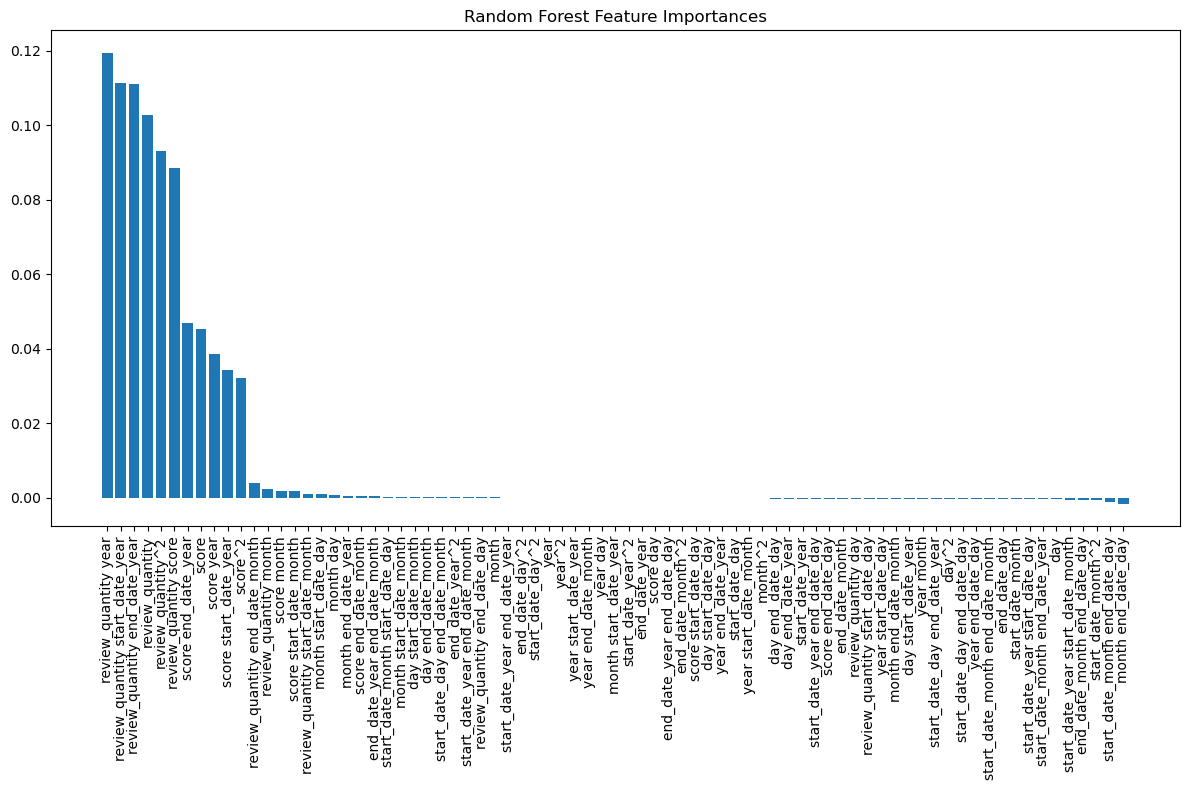

Random Forest Regressor:
Geriausi parametrai: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Treniravimo MSE: 153.24577765012015
Testavimo MSE: 354.7368932652083
Treniravimo R2: 0.9617843178534734
Testavimo R2: 0.9129844405580515
Kryžminės validacijos (cv=5) r2 reikšmės: [0.7416     0.78341706 0.82071552 0.89660169 0.72520787]
Kryžminės validacijos (cv=5) vidutinis r2: 0.7935084262448825
Kryžminės validacijos (cv=10) r2 reikšmės: [0.78880766 0.86429833 0.87508293 0.76285737 0.7957696  0.90510314
 0.89717785 0.88468628 0.82446859 0.8192378 ]
Kryžminės validacijos (cv=10) vidutinis r2: 0.8417489529469163


In [39]:
# Random Forest REgressor su polinominiais požymiais

# Sukuriame polinominius požymius
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Padalijame į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sukuriame RandomForestRegressor modelį
rf_regressor = RandomForestRegressor(random_state=42)

# Nustatome hiperparametrų tinklą
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Naudojame GridSearchCV geriausiems parametrams rasti
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Geriausi parametrai
best_params_rf = grid_search_rf.best_params_

# Geriausias modelis
best_model_rf = grid_search_rf.best_estimator_

# Atliekame prognozes su geriausiu modeliu
y_train_pred_rf = best_model_rf.predict(X_train_scaled)
y_test_pred_rf = best_model_rf.predict(X_test_scaled)

# Vertiname modelį
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

# Kryžminė validacija su pilnu duomenų rinkiniu
X_combined_scaled = scaler.fit_transform(X_poly)

cv_scores_rf_5 = cross_val_score(best_model_rf, X_combined_scaled, y, cv=5, scoring='r2')
cv_scores_rf_10 = cross_val_score(best_model_rf, X_combined_scaled, y, cv=10, scoring='r2')

# Požymių svarbos vertinimas
result_rf = permutation_importance(best_model_rf, X_test_scaled, y_test, n_repeats=10, random_state=42)
importance_rf = result_rf.importances_mean

# Požymių svarbos vizualizacija
features = poly.get_feature_names_out()
indices_rf = np.argsort(importance_rf)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_test.shape[1]), importance_rf[indices_rf], align="center")
plt.xticks(range(X_test.shape[1]), features[indices_rf], rotation=90)
plt.tight_layout()
plt.show()

# Rezultatų spausdinimas
print("Random Forest Regressor:")
print(f'Geriausi parametrai: {best_params_rf}')
print(f'Treniravimo MSE: {train_mse_rf}')
print(f'Testavimo MSE: {test_mse_rf}')
print(f'Treniravimo R2: {train_r2_rf}')
print(f'Testavimo R2: {test_r2_rf}')

print(f'Kryžminės validacijos (cv=5) r2 reikšmės: {cv_scores_rf_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis r2: {cv_scores_rf_5.mean()}')

print(f'Kryžminės validacijos (cv=10) r2 reikšmės: {cv_scores_rf_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis r2: {cv_scores_rf_10.mean()}')

### Neural Networks

MLP (Multilayer perceptron) regression

In [37]:
# Padalijame į treniravimo ir testavimo rinkinius
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Normalizuojame duomenis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sukuriame polinominius požymius
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Sukuriame MLP regresorių su hiperparametrų paieška
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

mlp_regressor = MLPRegressor(max_iter=1000, random_state=42)

grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_poly, y_train)

# Geriausi parametrai
best_params = grid_search.best_params_
print(f'Geriausi parametrai: {best_params}')

# Geriausias modelis
best_model = grid_search.best_estimator_

# Atliekame prognozes su geriausiu modeliu
y_train_pred = best_model.predict(X_train_poly)
y_test_pred = best_model.predict(X_test_poly)

# Vertiname modelį
train_mse_mlp = mean_squared_error(y_train, y_train_pred)
test_mse_mlp = mean_squared_error(y_test, y_test_pred)
train_r2_mlp = r2_score(y_train, y_train_pred)
test_r2_mlp = r2_score(y_test, y_test_pred)

# Kryžminė validacija su pilnu duomenų rinkiniu
cv_scores_5 = cross_val_score(best_model, X_train_poly, y_train, cv=5, scoring='r2')
cv_scores_10 = cross_val_score(best_model, X_train_poly, y_train, cv=10, scoring='r2')

# Požymių svarbos vertinimas
result = permutation_importance(best_model, X_test_poly, y_test, n_repeats=10, random_state=42)
importance = result.importances_mean

# Požymių svarbos vizualizacija
features = poly.get_feature_names_out()
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Požymių Svarbos")
plt.bar(range(X_test_poly.shape[1]), importance[indices], align="center")
plt.xticks(range(X_test_poly.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Rezultatų spausdinimas
print(f'Treniravimo MSE: {train_mse_mlp}')
print(f'Testavimo MSE: {test_mse_mlp}')
print(f'Treniravimo R2: {train_r2_mlp}')
print(f'Testavimo R2: {test_r2_mlp}')

print(f'Kryžminės validacijos (cv=5) R2 reikšmės: {cv_scores_5}')
print(f'Kryžminės validacijos (cv=5) vidutinis R2: {cv_scores_5.mean()}')

print(f'Kryžminės validacijos (cv=10) R2 reikšmės: {cv_scores_10}')
print(f'Kryžminės validacijos (cv=10) vidutinis R2: {cv_scores_10.mean()}')


KeyboardInterrupt: 

In [ ]:
# Create histograms
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram for train MSE
axes[0, 0].hist(train_mse_rf, bins='auto', alpha=0.5, label='Random Forest')
axes[0, 0].hist(train_mse_rfp, bins='auto', alpha=0.5, label='Second Set')
axes[0, 0].hist(train_mse_mlp, bins='auto', alpha=0.5, label='MLP')
axes[0, 0].set_title('Train MSE Comparison')
axes[0, 0].set_xlabel('MSE')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend(loc='best')

# Histogram for test MSE
axes[0, 1].hist(test_mse_rf, bins='auto', alpha=0.5, label='Random Forest')
axes[0, 1].hist(test_mse_rfp, bins='auto', alpha=0.5, label='Second Set')
axes[0, 1].hist(test_mse_mlp, bins='auto', alpha=0.5, label='MLP')
axes[0, 1].set_title('Test MSE Comparison')
axes[0, 1].set_xlabel('MSE')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend(loc='best')

# Histogram for train R²
axes[1, 0].hist(train_r2_rf, bins='auto', alpha=0.5, label='Random Forest')
axes[1, 0].hist(train_r2_rfp, bins='auto', alpha=0.5, label='Second Set')
axes[1, 0].hist(train_r2_mlp, bins='auto', alpha=0.5, label='MLP')
axes[1, 0].set_title('Train R² Comparison')
axes[1, 0].set_xlabel('R²')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend(loc='best')

# Histogram for test R²
axes[1, 1].hist(test_r2_rf, bins='auto', alpha=0.5, label='Random Forest')
axes[1, 1].hist(test_r2_rfp, bins='auto', alpha=0.5, label='Second Set')
axes[1, 1].hist(test_r2_mlp, bins='auto', alpha=0.5, label='MLP')
axes[1, 1].set_title('Test R² Comparison')
axes[1, 1].set_xlabel('R²')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend(loc='best')

plt.tight_layout()
plt.show()

POZYMIAI: 

review quantity  
score  
price  








# LAso, ridge, random forest. gintarevcs@gmail.com 860547452.

pries gridsearcha pasidaryti polinominius pozymius.

 neuronini tinkla(multilayer perceptron MLP(vertinsim koks mse tikslumas), lstm)
GAle palyginti reikes kas geriausiai prognozuoja, palyginti viena su kitu.

susirasti kuris klasifikatorius tiksliausiai speja.

tada su UI duoti susivesti duomenis, kad jam nuspetu kada jam geriausia kainos pasiulyma, jei tuo laikotarpiu nuomotusi. linearregsesion - ten yra ui vz. 




In [ ]:
# tkinter as tk - yra UI, kad vartotojas isivestu duomenis ir nereitku su input zaisti.